# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 14308 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 14308) |                   | Elapsed Time: 0:00:04 ETA:  16:38:49

  0% (   69 of 14308) |                    | Elapsed Time: 0:00:05 ETA:  0:03:29

  1% (  148 of 14308) |                    | Elapsed Time: 0:00:06 ETA:  0:03:10

  1% (  179 of 14308) |                    | Elapsed Time: 0:00:06 ETA:  0:03:04

  1% (  283 of 14308) |                    | Elapsed Time: 0:00:07 ETA:  0:02:44

  2% (  358 of 14308) |                    | Elapsed Time: 0:00:08 ETA:  0:02:37

  3% (  455 of 14308) |                    | Elapsed Time: 0:00:09 ETA:  0:02:32

  3% (  537 of 14308) |                    | Elapsed Time: 0:00:10 ETA:  0:02:30

  4% (  623 of 14308) |                    | Elapsed Time: 0:00:11 ETA:  0:02:30

  5% (  716 of 14308) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:27

  5% (  811 of 14308) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:20

  6% (  895 of 14308) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:16

  6% (  987 of 14308) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:15

  7% ( 1074 of 14308) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:18

  8% ( 1167 of 14308) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:18

  8% ( 1252 of 14308) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:16

  9% ( 1349 of 14308) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:13

  9% ( 1409 of 14308) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:20

 10% ( 1431 of 14308) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:21

 10% ( 1531 of 14308) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:18

 11% ( 1610 of 14308) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:15

 11% ( 1693 of 14308) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:15

 12% ( 1789 of 14308) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:16

 13% ( 1877 of 14308) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:18

 13% ( 1968 of 14308) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:16

 14% ( 2062 of 14308) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:07

 15% ( 2147 of 14308) |###                 | Elapsed Time: 0:00:28 ETA:  0:02:10

 15% ( 2243 of 14308) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:10

 16% ( 2326 of 14308) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:07

 16% ( 2421 of 14308) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:05

 17% ( 2504 of 14308) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:03

 18% ( 2599 of 14308) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:01

 18% ( 2683 of 14308) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:04

 19% ( 2766 of 14308) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:03

 19% ( 2835 of 14308) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:07

 20% ( 2862 of 14308) |####                | Elapsed Time: 0:00:36 ETA:  0:02:10

 20% ( 2942 of 14308) |####                | Elapsed Time: 0:00:37 ETA:  0:02:12

 21% ( 3041 of 14308) |####                | Elapsed Time: 0:00:38 ETA:  0:02:17

 21% ( 3135 of 14308) |####                | Elapsed Time: 0:00:39 ETA:  0:02:16

 22% ( 3187 of 14308) |####                | Elapsed Time: 0:00:40 ETA:  0:02:25

 22% ( 3220 of 14308) |####                | Elapsed Time: 0:00:40 ETA:  0:02:25

 23% ( 3321 of 14308) |####                | Elapsed Time: 0:00:41 ETA:  0:02:18

 23% ( 3399 of 14308) |####                | Elapsed Time: 0:00:42 ETA:  0:02:09

 24% ( 3504 of 14308) |####                | Elapsed Time: 0:00:43 ETA:  0:02:02

 25% ( 3577 of 14308) |#####               | Elapsed Time: 0:00:44 ETA:  0:01:57

 25% ( 3682 of 14308) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:50

 26% ( 3756 of 14308) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:48

 26% ( 3843 of 14308) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:49

 27% ( 3912 of 14308) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:44

 27% ( 3935 of 14308) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:43

 28% ( 4028 of 14308) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:43

 28% ( 4114 of 14308) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:44

 29% ( 4215 of 14308) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:44

 30% ( 4293 of 14308) |######              | Elapsed Time: 0:00:52 ETA:  0:01:42

 30% ( 4390 of 14308) |######              | Elapsed Time: 0:00:53 ETA:  0:01:43

 31% ( 4472 of 14308) |######              | Elapsed Time: 0:00:54 ETA:  0:01:43

 31% ( 4573 of 14308) |######              | Elapsed Time: 0:00:55 ETA:  0:01:38

 32% ( 4651 of 14308) |######              | Elapsed Time: 0:00:55 ETA:  0:01:32

 33% ( 4750 of 14308) |######              | Elapsed Time: 0:00:56 ETA:  0:01:31

 33% ( 4829 of 14308) |######              | Elapsed Time: 0:00:57 ETA:  0:01:27

 34% ( 4931 of 14308) |######              | Elapsed Time: 0:00:58 ETA:  0:01:24

 35% ( 5008 of 14308) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:23

 35% ( 5097 of 14308) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:24

 36% ( 5187 of 14308) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:23

 36% ( 5291 of 14308) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:21

 37% ( 5366 of 14308) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:24

 38% ( 5460 of 14308) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:23

 38% ( 5545 of 14308) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:22

 39% ( 5645 of 14308) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:22

 40% ( 5724 of 14308) |########            | Elapsed Time: 0:01:07 ETA:  0:01:34

 40% ( 5827 of 14308) |########            | Elapsed Time: 0:01:08 ETA:  0:01:30

 41% ( 5903 of 14308) |########            | Elapsed Time: 0:01:09 ETA:  0:01:28

 41% ( 6002 of 14308) |########            | Elapsed Time: 0:01:10 ETA:  0:01:28

 42% ( 6081 of 14308) |########            | Elapsed Time: 0:01:10 ETA:  0:01:22

 43% ( 6191 of 14308) |########            | Elapsed Time: 0:01:11 ETA:  0:01:18

 43% ( 6260 of 14308) |########            | Elapsed Time: 0:01:12 ETA:  0:01:16

 44% ( 6360 of 14308) |########            | Elapsed Time: 0:01:13 ETA:  0:01:15

 45% ( 6439 of 14308) |#########           | Elapsed Time: 0:01:14 ETA:  0:01:02

 45% ( 6531 of 14308) |#########           | Elapsed Time: 0:01:15 ETA:  0:01:03

 46% ( 6618 of 14308) |#########           | Elapsed Time: 0:01:16 ETA:  0:01:03

 46% ( 6721 of 14308) |#########           | Elapsed Time: 0:01:17 ETA:  0:01:02

 47% ( 6797 of 14308) |#########           | Elapsed Time: 0:01:17 ETA:  0:01:01

 48% ( 6894 of 14308) |#########           | Elapsed Time: 0:01:18 ETA:  0:01:01

 48% ( 6976 of 14308) |#########           | Elapsed Time: 0:01:19 ETA:  0:01:02

 49% ( 7075 of 14308) |#########           | Elapsed Time: 0:01:20 ETA:  0:01:02

 50% ( 7154 of 14308) |##########          | Elapsed Time: 0:01:21 ETA:  0:01:01

 50% ( 7245 of 14308) |##########          | Elapsed Time: 0:01:22 ETA:  0:01:03

 51% ( 7333 of 14308) |##########          | Elapsed Time: 0:01:23 ETA:  0:01:02

 51% ( 7436 of 14308) |##########          | Elapsed Time: 0:01:24 ETA:  0:01:01

 52% ( 7512 of 14308) |##########          | Elapsed Time: 0:01:25 ETA:  0:01:01

 53% ( 7621 of 14308) |##########          | Elapsed Time: 0:01:26 ETA:  0:00:58

 53% ( 7691 of 14308) |##########          | Elapsed Time: 0:01:26 ETA:  0:00:57

 54% ( 7788 of 14308) |##########          | Elapsed Time: 0:01:27 ETA:  0:00:57

 55% ( 7870 of 14308) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:59

 55% ( 7968 of 14308) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:59

 56% ( 8049 of 14308) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:55

 56% ( 8143 of 14308) |###########         | Elapsed Time: 0:01:31 ETA:  0:00:54

 57% ( 8228 of 14308) |###########         | Elapsed Time: 0:01:32 ETA:  0:00:52

 58% ( 8330 of 14308) |###########         | Elapsed Time: 0:01:33 ETA:  0:00:51

 58% ( 8406 of 14308) |###########         | Elapsed Time: 0:01:34 ETA:  0:00:52

 59% ( 8505 of 14308) |###########         | Elapsed Time: 0:01:35 ETA:  0:00:51

 60% ( 8585 of 14308) |############        | Elapsed Time: 0:01:36 ETA:  0:00:51

 60% ( 8676 of 14308) |############        | Elapsed Time: 0:01:37 ETA:  0:00:49

 61% ( 8764 of 14308) |############        | Elapsed Time: 0:01:38 ETA:  0:00:47

 61% ( 8809 of 14308) |############        | Elapsed Time: 0:01:39 ETA:  0:00:59

 62% ( 8913 of 14308) |############        | Elapsed Time: 0:01:40 ETA:  0:00:56

 62% ( 8943 of 14308) |############        | Elapsed Time: 0:01:40 ETA:  0:00:58

 63% ( 9045 of 14308) |############        | Elapsed Time: 0:01:41 ETA:  0:00:57

 63% ( 9122 of 14308) |############        | Elapsed Time: 0:01:42 ETA:  0:00:56

 64% ( 9219 of 14308) |############        | Elapsed Time: 0:01:43 ETA:  0:00:55

 65% ( 9301 of 14308) |#############       | Elapsed Time: 0:01:44 ETA:  0:00:53

 65% ( 9404 of 14308) |#############       | Elapsed Time: 0:01:45 ETA:  0:00:49

 66% ( 9480 of 14308) |#############       | Elapsed Time: 0:01:45 ETA:  0:00:51

 66% ( 9571 of 14308) |#############       | Elapsed Time: 0:01:46 ETA:  0:00:39

 67% ( 9658 of 14308) |#############       | Elapsed Time: 0:01:47 ETA:  0:00:39

 68% ( 9751 of 14308) |#############       | Elapsed Time: 0:01:48 ETA:  0:00:40

 68% ( 9837 of 14308) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:41

 69% ( 9925 of 14308) |#############       | Elapsed Time: 0:01:50 ETA:  0:00:42

 70% (10016 of 14308) |##############      | Elapsed Time: 0:01:51 ETA:  0:00:40

 70% (10116 of 14308) |##############      | Elapsed Time: 0:01:52 ETA:  0:00:38

 71% (10195 of 14308) |##############      | Elapsed Time: 0:01:53 ETA:  0:00:38

 71% (10289 of 14308) |##############      | Elapsed Time: 0:01:54 ETA:  0:00:37

 72% (10374 of 14308) |##############      | Elapsed Time: 0:01:55 ETA:  0:00:36

 73% (10461 of 14308) |##############      | Elapsed Time: 0:01:56 ETA:  0:00:37

 73% (10553 of 14308) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:37

 74% (10624 of 14308) |##############      | Elapsed Time: 0:01:58 ETA:  0:00:39

 75% (10731 of 14308) |###############     | Elapsed Time: 0:01:59 ETA:  0:00:43

 75% (10826 of 14308) |###############     | Elapsed Time: 0:02:00 ETA:  0:00:42

 76% (10910 of 14308) |###############     | Elapsed Time: 0:02:01 ETA:  0:00:40

 76% (11007 of 14308) |###############     | Elapsed Time: 0:02:02 ETA:  0:00:37

 77% (11089 of 14308) |###############     | Elapsed Time: 0:02:03 ETA:  0:00:34

 78% (11183 of 14308) |###############     | Elapsed Time: 0:02:04 ETA:  0:00:31

 78% (11268 of 14308) |###############     | Elapsed Time: 0:02:05 ETA:  0:00:28

 79% (11367 of 14308) |###############     | Elapsed Time: 0:02:06 ETA:  0:00:21

 80% (11447 of 14308) |################    | Elapsed Time: 0:02:07 ETA:  0:00:19

 80% (11544 of 14308) |################    | Elapsed Time: 0:02:08 ETA:  0:00:18

 81% (11626 of 14308) |################    | Elapsed Time: 0:02:08 ETA:  0:00:16

 81% (11724 of 14308) |################    | Elapsed Time: 0:02:09 ETA:  0:00:16

 82% (11805 of 14308) |################    | Elapsed Time: 0:02:10 ETA:  0:00:14

 83% (11903 of 14308) |################    | Elapsed Time: 0:02:11 ETA:  0:00:13

 83% (11983 of 14308) |################    | Elapsed Time: 0:02:12 ETA:  0:00:11

 84% (12080 of 14308) |################    | Elapsed Time: 0:02:13 ETA:  0:00:11

 85% (12162 of 14308) |#################   | Elapsed Time: 0:02:14 ETA:  0:00:11

 85% (12255 of 14308) |#################   | Elapsed Time: 0:02:15 ETA:  0:00:11

 86% (12341 of 14308) |#################   | Elapsed Time: 0:02:16 ETA:  0:00:09

 86% (12447 of 14308) |#################   | Elapsed Time: 0:02:17 ETA:  0:00:07

 87% (12520 of 14308) |#################   | Elapsed Time: 0:02:17 ETA:  0:00:05

 87% (12548 of 14308) |#################   | Elapsed Time: 0:02:18 ETA:  0:00:19

 88% (12646 of 14308) |#################   | Elapsed Time: 0:02:19 ETA:  0:00:18

 88% (12699 of 14308) |#################   | Elapsed Time: 0:02:20 ETA:  0:00:17

 89% (12793 of 14308) |#################   | Elapsed Time: 0:02:21 ETA:  0:00:17

 90% (12878 of 14308) |##################  | Elapsed Time: 0:02:22 ETA:  0:00:16

 90% (12982 of 14308) |##################  | Elapsed Time: 0:02:23 ETA:  0:00:12

 91% (13057 of 14308) |##################  | Elapsed Time: 0:02:24 ETA:  0:00:23

 92% (13164 of 14308) |##################  | Elapsed Time: 0:02:25 ETA:  0:00:20

 92% (13235 of 14308) |##################  | Elapsed Time: 0:02:25 ETA:  0:00:02

 93% (13332 of 14308) |##################  | Elapsed Time: 0:02:26 ETA:  0:00:01

 93% (13414 of 14308) |##################  | Elapsed Time: 0:02:27 ETA:  0:00:02

 94% (13508 of 14308) |##################  | Elapsed Time: 0:02:28 ETA:  0:00:02

 95% (13593 of 14308) |################### | Elapsed Time: 0:02:29 ETA:  0:00:00

 95% (13677 of 14308) |################### | Elapsed Time: 0:02:30 ETA:  0:00:04

 96% (13772 of 14308) |################### | Elapsed Time: 0:02:31 ETA:  0:00:00

 96% (13873 of 14308) |################### | Elapsed Time: 0:02:32 ETA:  0:00:00

 97% (13951 of 14308) |################### | Elapsed Time: 0:02:33 ETA:  0:00:00

 98% (14039 of 14308) |################### | Elapsed Time: 0:02:34 ETA:  0:00:00

 98% (14130 of 14308) |################### | Elapsed Time: 0:02:35 ETA:  0:00:00

 99% (14226 of 14308) |################### | Elapsed Time: 0:02:36 ETA:  0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:02:37 Time: 0:02:37


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

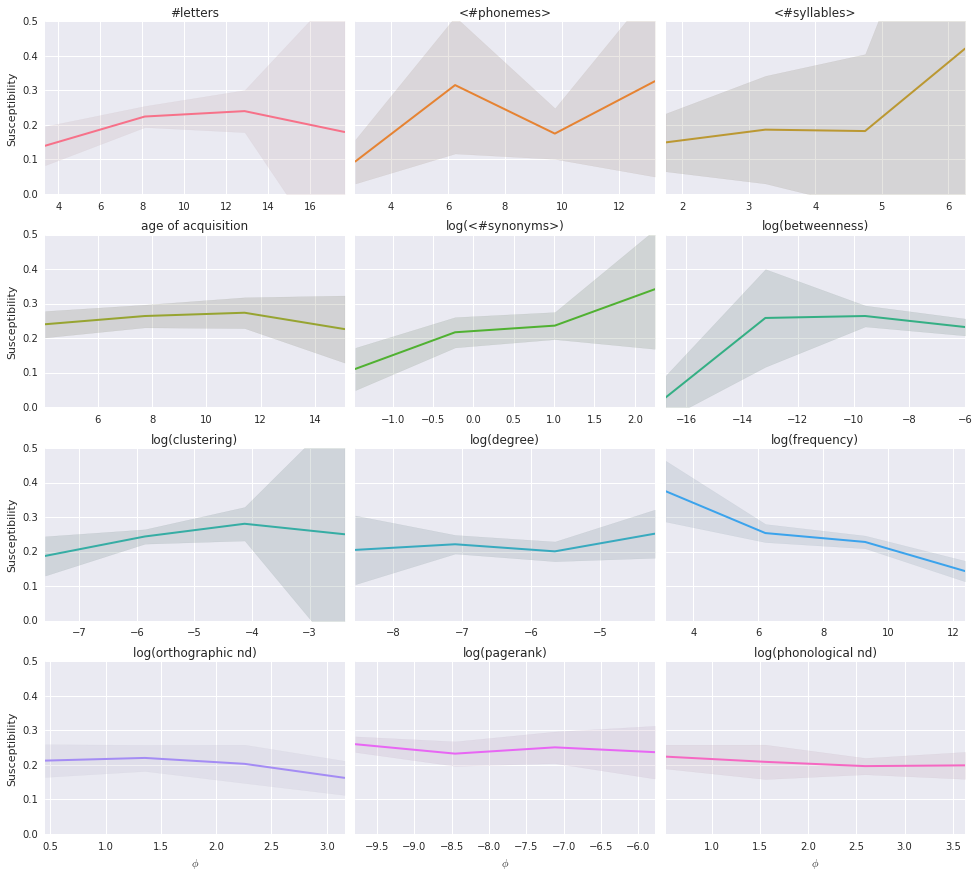

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

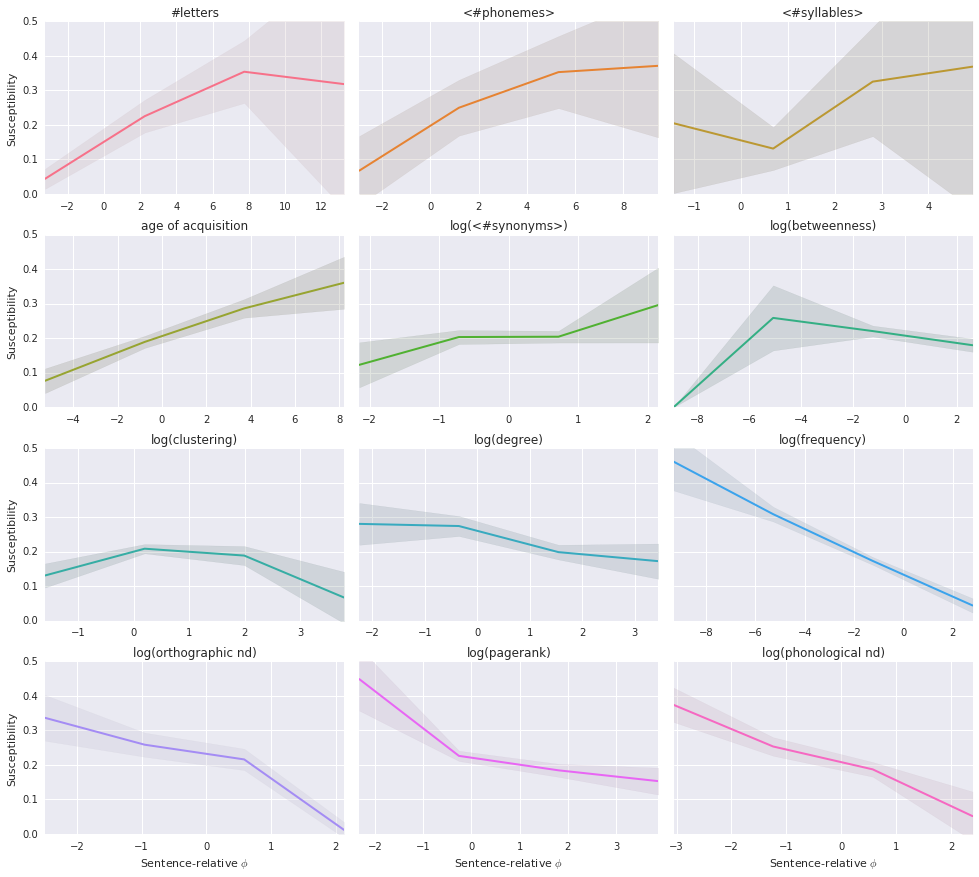

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

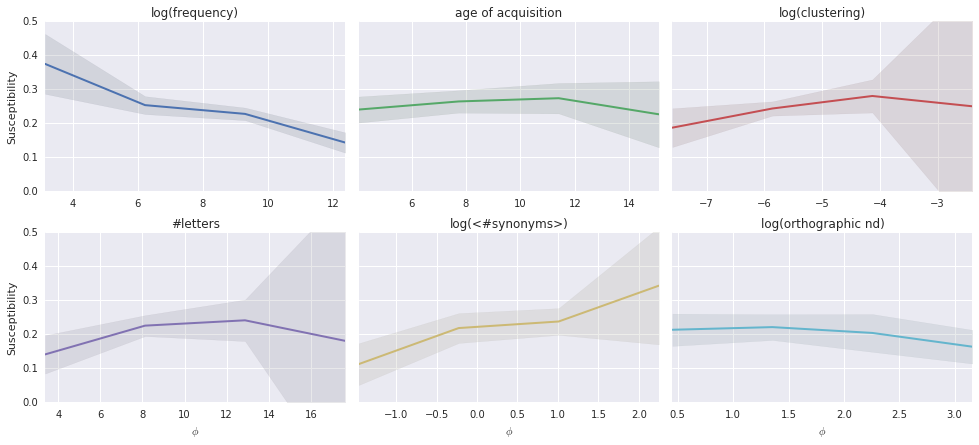

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

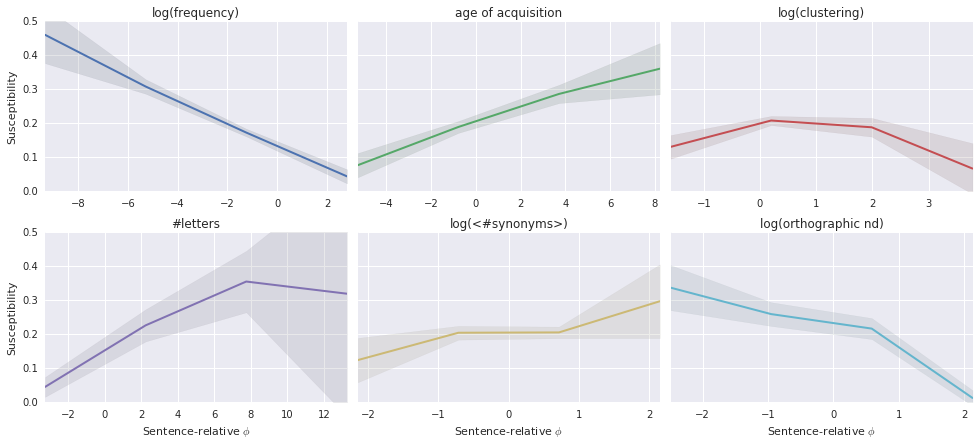

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

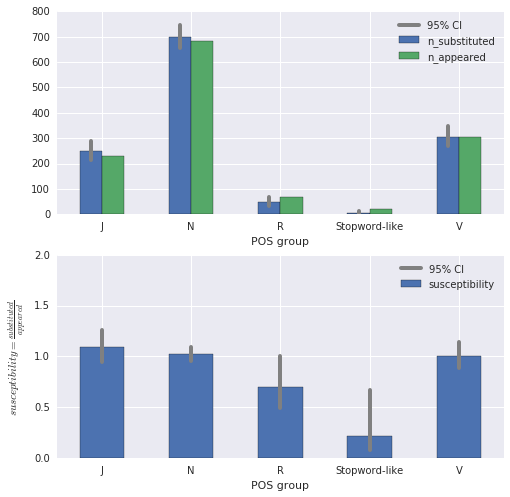

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

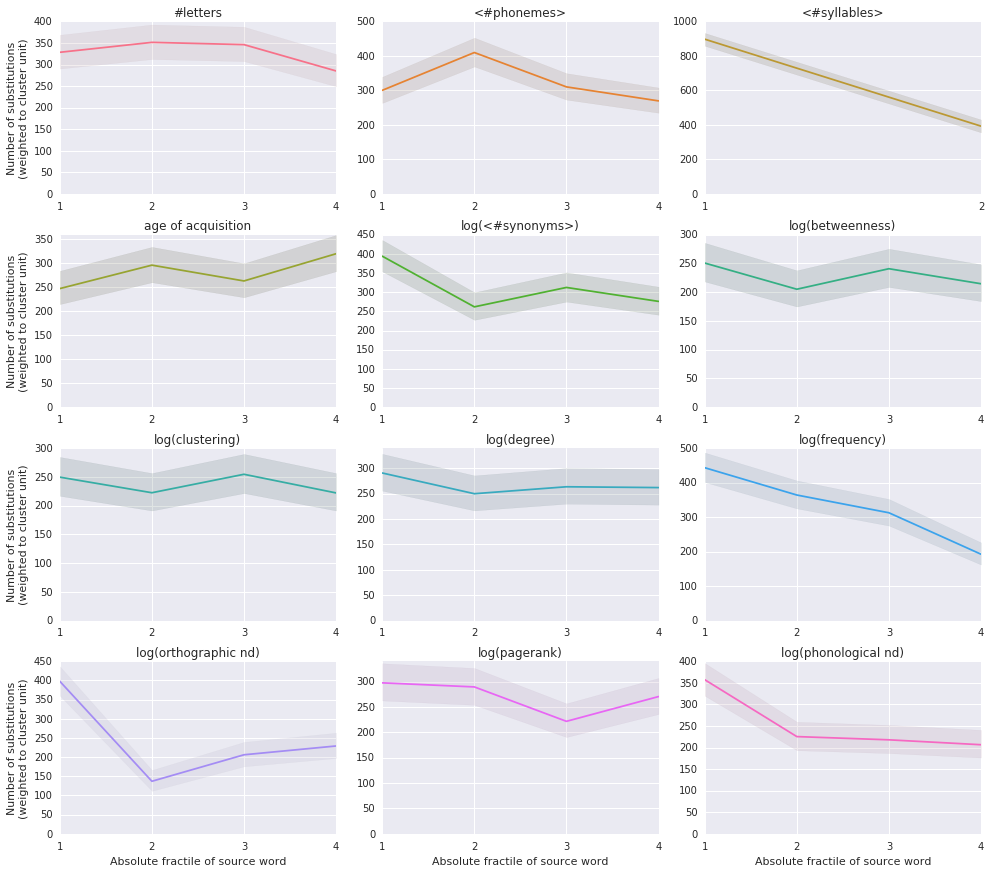

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

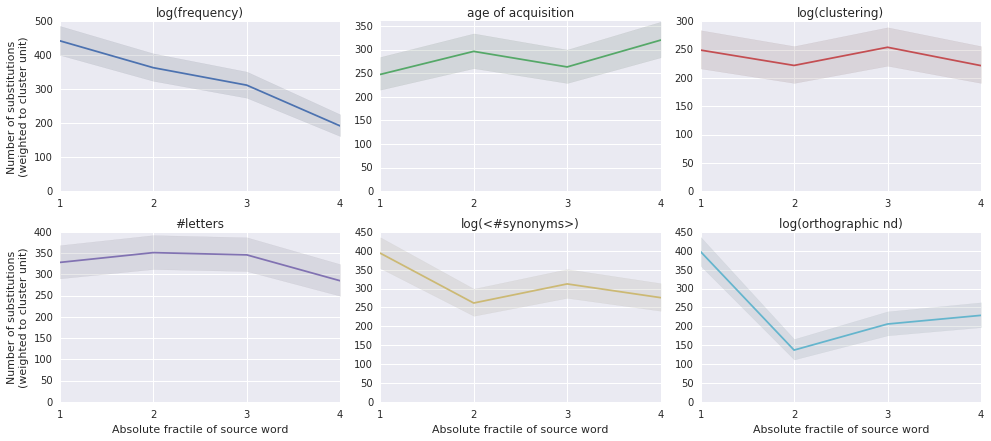

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   80 of 14308) |                    | Elapsed Time: 0:00:01 ETA:  0:02:59

  1% (  158 of 14308) |                    | Elapsed Time: 0:00:02 ETA:  0:03:01

  1% (  179 of 14308) |                    | Elapsed Time: 0:00:02 ETA:  0:03:02

  1% (  251 of 14308) |                    | Elapsed Time: 0:00:03 ETA:  0:03:08

  2% (  322 of 14308) |                    | Elapsed Time: 0:00:04 ETA:  0:03:10

  2% (  358 of 14308) |                    | Elapsed Time: 0:00:04 ETA:  0:03:04

  3% (  440 of 14308) |                    | Elapsed Time: 0:00:05 ETA:  0:03:00

  3% (  537 of 14308) |                    | Elapsed Time: 0:00:06 ETA:  0:02:53

  4% (  620 of 14308) |                    | Elapsed Time: 0:00:07 ETA:  0:02:51

  4% (  690 of 14308) |                    | Elapsed Time: 0:00:08 ETA:  0:02:53

  5% (  716 of 14308) |#                   | Elapsed Time: 0:00:09 ETA:  0:02:54

  5% (  783 of 14308) |#                   | Elapsed Time: 0:00:10 ETA:  0:02:55

  5% (  850 of 14308) |#                   | Elapsed Time: 0:00:11 ETA:  0:02:56

  6% (  895 of 14308) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:01

  6% (  958 of 14308) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:07

  7% ( 1031 of 14308) |#                   | Elapsed Time: 0:00:13 ETA:  0:03:12

  7% ( 1074 of 14308) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:13

  8% ( 1168 of 14308) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:07

  8% ( 1252 of 14308) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:01

  9% ( 1351 of 14308) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:49

 10% ( 1431 of 14308) |##                  | Elapsed Time: 0:00:18 ETA:  0:02:44

 10% ( 1505 of 14308) |##                  | Elapsed Time: 0:00:19 ETA:  0:02:39

 11% ( 1610 of 14308) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:29

 11% ( 1674 of 14308) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:38

 12% ( 1762 of 14308) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:35

 12% ( 1789 of 14308) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:36

 13% ( 1870 of 14308) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:41

 13% ( 1949 of 14308) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:36

 13% ( 1968 of 14308) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:35

 14% ( 2054 of 14308) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:30

 15% ( 2147 of 14308) |###                 | Elapsed Time: 0:00:27 ETA:  0:02:33

 15% ( 2263 of 14308) |###                 | Elapsed Time: 0:00:28 ETA:  0:02:16

 16% ( 2326 of 14308) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:17

 16% ( 2409 of 14308) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:15

 17% ( 2504 of 14308) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:11

 17% ( 2574 of 14308) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:15

 18% ( 2651 of 14308) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:17

 18% ( 2683 of 14308) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:18

 19% ( 2754 of 14308) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:20

 19% ( 2819 of 14308) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:35

 20% ( 2862 of 14308) |####                | Elapsed Time: 0:00:37 ETA:  0:02:42

 20% ( 2938 of 14308) |####                | Elapsed Time: 0:00:38 ETA:  0:02:43

 21% ( 3007 of 14308) |####                | Elapsed Time: 0:00:39 ETA:  0:02:49

 21% ( 3041 of 14308) |####                | Elapsed Time: 0:00:39 ETA:  0:02:51

 21% ( 3104 of 14308) |####                | Elapsed Time: 0:00:40 ETA:  0:02:53

 22% ( 3167 of 14308) |####                | Elapsed Time: 0:00:41 ETA:  0:02:57

 22% ( 3220 of 14308) |####                | Elapsed Time: 0:00:42 ETA:  0:02:56

 23% ( 3307 of 14308) |####                | Elapsed Time: 0:00:43 ETA:  0:02:48

 23% ( 3380 of 14308) |####                | Elapsed Time: 0:00:44 ETA:  0:02:44

 23% ( 3399 of 14308) |####                | Elapsed Time: 0:00:44 ETA:  0:02:40

 24% ( 3464 of 14308) |####                | Elapsed Time: 0:00:45 ETA:  0:02:44

 24% ( 3548 of 14308) |####                | Elapsed Time: 0:00:46 ETA:  0:02:37

 25% ( 3577 of 14308) |#####               | Elapsed Time: 0:00:47 ETA:  0:02:33

 25% ( 3663 of 14308) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:24

 26% ( 3738 of 14308) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:19

 26% ( 3756 of 14308) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:16

 26% ( 3836 of 14308) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:17

 27% ( 3898 of 14308) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:20

 27% ( 3935 of 14308) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:28

 27% ( 3959 of 14308) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:46

 28% ( 4011 of 14308) |#####               | Elapsed Time: 0:00:54 ETA:  0:03:00

 28% ( 4072 of 14308) |#####               | Elapsed Time: 0:00:55 ETA:  0:03:01

 28% ( 4114 of 14308) |#####               | Elapsed Time: 0:00:56 ETA:  0:03:16

 29% ( 4193 of 14308) |#####               | Elapsed Time: 0:00:57 ETA:  0:03:13

 29% ( 4272 of 14308) |#####               | Elapsed Time: 0:00:58 ETA:  0:03:04

 30% ( 4293 of 14308) |######              | Elapsed Time: 0:00:58 ETA:  0:03:10

 30% ( 4376 of 14308) |######              | Elapsed Time: 0:00:59 ETA:  0:02:58

 31% ( 4448 of 14308) |######              | Elapsed Time: 0:01:01 ETA:  0:03:08

 31% ( 4472 of 14308) |######              | Elapsed Time: 0:01:01 ETA:  0:02:44

 31% ( 4554 of 14308) |######              | Elapsed Time: 0:01:02 ETA:  0:02:31

 32% ( 4632 of 14308) |######              | Elapsed Time: 0:01:03 ETA:  0:02:23

 32% ( 4651 of 14308) |######              | Elapsed Time: 0:01:03 ETA:  0:02:20

 33% ( 4726 of 14308) |######              | Elapsed Time: 0:01:04 ETA:  0:02:20

 33% ( 4794 of 14308) |######              | Elapsed Time: 0:01:05 ETA:  0:02:24

 33% ( 4829 of 14308) |######              | Elapsed Time: 0:01:06 ETA:  0:02:23

 34% ( 4894 of 14308) |######              | Elapsed Time: 0:01:07 ETA:  0:02:29

 34% ( 4963 of 14308) |######              | Elapsed Time: 0:01:08 ETA:  0:02:07

 35% ( 5008 of 14308) |#######             | Elapsed Time: 0:01:08 ETA:  0:02:06

 35% ( 5087 of 14308) |#######             | Elapsed Time: 0:01:09 ETA:  0:02:06

 36% ( 5168 of 14308) |#######             | Elapsed Time: 0:01:10 ETA:  0:02:04

 36% ( 5187 of 14308) |#######             | Elapsed Time: 0:01:10 ETA:  0:02:02

 36% ( 5264 of 14308) |#######             | Elapsed Time: 0:01:11 ETA:  0:02:00

 37% ( 5332 of 14308) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:59

 37% ( 5366 of 14308) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:59

 38% ( 5444 of 14308) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:53

 38% ( 5525 of 14308) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:48

 38% ( 5545 of 14308) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:51

 39% ( 5615 of 14308) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:53

 39% ( 5699 of 14308) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:51

 40% ( 5724 of 14308) |########            | Elapsed Time: 0:01:18 ETA:  0:01:51

 40% ( 5817 of 14308) |########            | Elapsed Time: 0:01:19 ETA:  0:01:44

 41% ( 5903 of 14308) |########            | Elapsed Time: 0:01:20 ETA:  0:01:35

 41% ( 5988 of 14308) |########            | Elapsed Time: 0:01:21 ETA:  0:01:33

 42% ( 6065 of 14308) |########            | Elapsed Time: 0:01:22 ETA:  0:01:32

 42% ( 6081 of 14308) |########            | Elapsed Time: 0:01:22 ETA:  0:01:32

 43% ( 6154 of 14308) |########            | Elapsed Time: 0:01:23 ETA:  0:01:32

 43% ( 6260 of 14308) |########            | Elapsed Time: 0:01:24 ETA:  0:01:25

 44% ( 6335 of 14308) |########            | Elapsed Time: 0:01:25 ETA:  0:01:26

 44% ( 6421 of 14308) |########            | Elapsed Time: 0:01:26 ETA:  0:01:27

 45% ( 6439 of 14308) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:31

 45% ( 6520 of 14308) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:31

 46% ( 6587 of 14308) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:34

 46% ( 6618 of 14308) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:32

 46% ( 6717 of 14308) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:23

 47% ( 6797 of 14308) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:25

 47% ( 6867 of 14308) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:27

 48% ( 6958 of 14308) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:22

 48% ( 6976 of 14308) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:23

 49% ( 7058 of 14308) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:22

 50% ( 7154 of 14308) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:16

 50% ( 7229 of 14308) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:17

 51% ( 7309 of 14308) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:22

 51% ( 7333 of 14308) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:22

 51% ( 7416 of 14308) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:17

 52% ( 7496 of 14308) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:20

 52% ( 7512 of 14308) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:21

 53% ( 7605 of 14308) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:16

 53% ( 7691 of 14308) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:17

 54% ( 7782 of 14308) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:11

 55% ( 7870 of 14308) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:06

 55% ( 7963 of 14308) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:02

 56% ( 8049 of 14308) |###########         | Elapsed Time: 0:01:46 ETA:  0:00:58

 56% ( 8128 of 14308) |###########         | Elapsed Time: 0:01:47 ETA:  0:00:57

 57% ( 8209 of 14308) |###########         | Elapsed Time: 0:01:48 ETA:  0:00:56

 57% ( 8228 of 14308) |###########         | Elapsed Time: 0:01:48 ETA:  0:00:59

 58% ( 8310 of 14308) |###########         | Elapsed Time: 0:01:49 ETA:  0:00:56

 58% ( 8384 of 14308) |###########         | Elapsed Time: 0:01:50 ETA:  0:00:58

 58% ( 8406 of 14308) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:01

 59% ( 8481 of 14308) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:05

 59% ( 8553 of 14308) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:11

 60% ( 8585 of 14308) |############        | Elapsed Time: 0:01:53 ETA:  0:01:16

 60% ( 8656 of 14308) |############        | Elapsed Time: 0:01:54 ETA:  0:01:18

 61% ( 8735 of 14308) |############        | Elapsed Time: 0:01:55 ETA:  0:01:17

 61% ( 8764 of 14308) |############        | Elapsed Time: 0:01:55 ETA:  0:01:16

 61% ( 8853 of 14308) |############        | Elapsed Time: 0:01:56 ETA:  0:01:12

 62% ( 8943 of 14308) |############        | Elapsed Time: 0:01:57 ETA:  0:01:05

 63% ( 9038 of 14308) |############        | Elapsed Time: 0:01:58 ETA:  0:00:58

 63% ( 9122 of 14308) |############        | Elapsed Time: 0:01:59 ETA:  0:00:51

 64% ( 9208 of 14308) |############        | Elapsed Time: 0:02:00 ETA:  0:00:46

 64% ( 9283 of 14308) |############        | Elapsed Time: 0:02:01 ETA:  0:00:47

 65% ( 9301 of 14308) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:44

 65% ( 9394 of 14308) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:39

 66% ( 9480 of 14308) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:38

 66% ( 9570 of 14308) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:37

 67% ( 9658 of 14308) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:40

 68% ( 9742 of 14308) |#############       | Elapsed Time: 0:02:06 ETA:  0:00:42

 68% ( 9824 of 14308) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:42

 68% ( 9837 of 14308) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:40

 69% ( 9926 of 14308) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:37

 70% (10016 of 14308) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:39

 70% (10089 of 14308) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:44

 70% (10148 of 14308) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:52

 71% (10195 of 14308) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:51

 71% (10283 of 14308) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:49

 72% (10374 of 14308) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:46

 73% (10454 of 14308) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:48

 73% (10533 of 14308) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:48

 73% (10553 of 14308) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:51

 74% (10627 of 14308) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:49

 74% (10713 of 14308) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:39

 75% (10731 of 14308) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:39

 75% (10812 of 14308) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:40

 76% (10883 of 14308) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:44

 76% (10910 of 14308) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:43

 76% (10999 of 14308) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:39

 77% (11089 of 14308) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:33

 78% (11174 of 14308) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:29

 78% (11268 of 14308) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:25

 79% (11355 of 14308) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:24

 79% (11412 of 14308) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:49

 80% (11447 of 14308) |################    | Elapsed Time: 0:02:29 ETA:  0:00:46

 80% (11523 of 14308) |################    | Elapsed Time: 0:02:30 ETA:  0:00:45

 81% (11602 of 14308) |################    | Elapsed Time: 0:02:31 ETA:  0:00:48

 81% (11626 of 14308) |################    | Elapsed Time: 0:02:31 ETA:  0:00:52

 81% (11711 of 14308) |################    | Elapsed Time: 0:02:32 ETA:  0:00:47

 82% (11805 of 14308) |################    | Elapsed Time: 0:02:33 ETA:  0:00:54

 83% (11887 of 14308) |################    | Elapsed Time: 0:02:34 ETA:  0:00:55

 83% (11983 of 14308) |################    | Elapsed Time: 0:02:35 ETA:  0:00:20

 84% (12066 of 14308) |################    | Elapsed Time: 0:02:36 ETA:  0:00:17

 85% (12162 of 14308) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:13

 85% (12226 of 14308) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:19

 86% (12308 of 14308) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:18

 86% (12341 of 14308) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:17

 86% (12431 of 14308) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:14

 87% (12520 of 14308) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:12

 88% (12612 of 14308) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:08

 88% (12699 of 14308) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:07

 89% (12789 of 14308) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:04

 90% (12878 of 14308) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 90% (12964 of 14308) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 91% (13057 of 14308) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 91% (13143 of 14308) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 92% (13235 of 14308) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 93% (13319 of 14308) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 93% (13414 of 14308) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 94% (13495 of 14308) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 95% (13593 of 14308) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 95% (13666 of 14308) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

 96% (13746 of 14308) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 96% (13772 of 14308) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 96% (13851 of 14308) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 97% (13951 of 14308) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (14030 of 14308) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 98% (14130 of 14308) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 99% (14215 of 14308) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:03:03 Time: 0:03:03


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

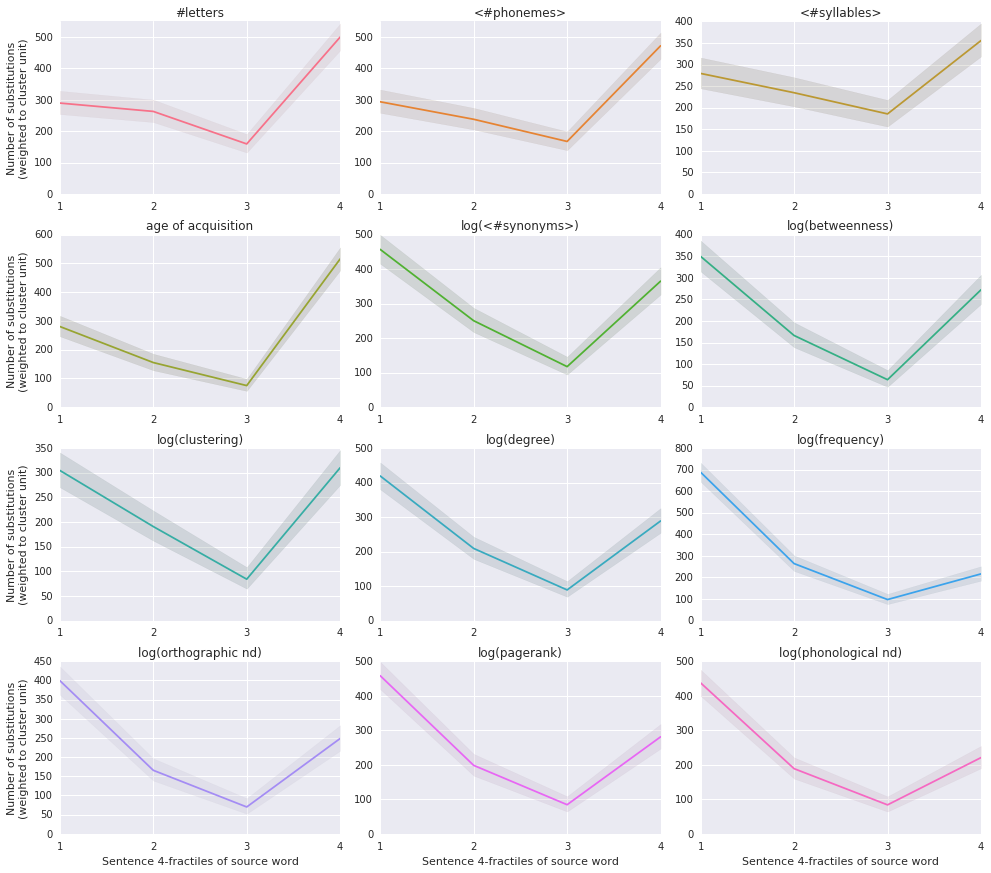

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

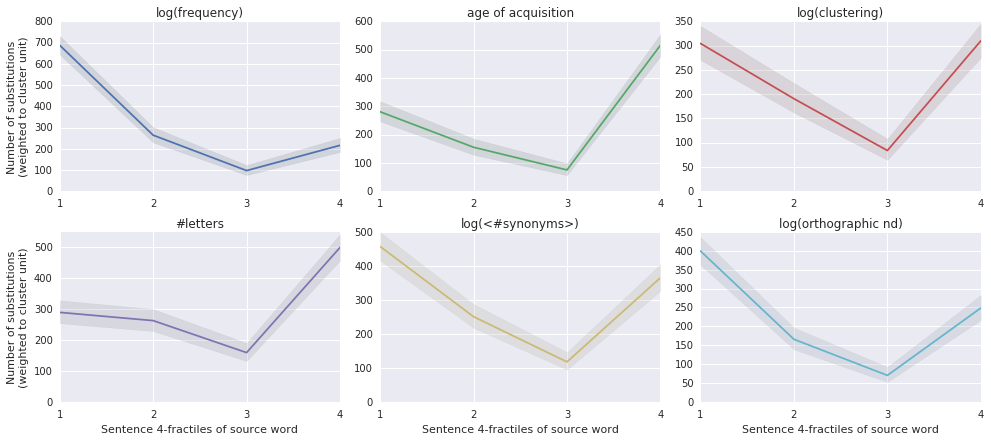

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)